Motivation behind our project

-Global hotel cancellation rates on booking have reached 40% on average

-predictions on hotel booking cancellations

-consists of hotel booking data and transactions from 2015 to 2017

In [3]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('./hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
df.drop(['agent','company'],axis=1,inplace=True)

In [6]:
df['arrival_date_month'] = df['arrival_date_month'].map({'January':1,'February':2,'March':3,
                                                         'April':4,'May':5,'June':6,'July':7,
                                                         'August':8,'September':9,'October':10,
                                                         'November':11,'December':12})


In [7]:
df = df.sort_values(by='arrival_date_month')

In [7]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
13803,Resort Hotel,0,7,2016,1,3,13,0,2,1,...,D,0,No Deposit,0,Transient,27.0,0,0,Check-Out,2016-01-15
9942,Resort Hotel,1,78,2017,1,4,28,0,1,2,...,A,0,No Deposit,0,Transient,42.0,0,1,Canceled,2017-01-17
9943,Resort Hotel,1,16,2017,1,4,28,0,1,2,...,A,0,No Deposit,0,Transient,78.0,0,0,Canceled,2017-01-12
9944,Resort Hotel,1,17,2017,1,4,28,0,1,1,...,A,0,Non Refund,0,Transient-Party,32.0,0,0,Canceled,2017-01-28
9945,Resort Hotel,1,94,2017,1,4,28,0,1,2,...,A,0,No Deposit,0,Transient,42.0,0,1,Canceled,2016-10-27


In [8]:
df.drop(df[df['children'].isnull()==True].index,inplace=True)
df.drop(df[df['country'].isnull()==True].index,inplace=True)

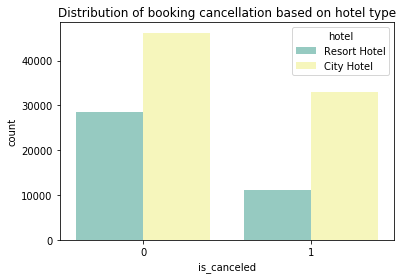

In [9]:
plt.title("Distribution of booking cancellation based on hotel type")
plt.xlabel('Booking canceled')
plt.ylabel('Frequency [%]')

sns.countplot(data = df,x = 'is_canceled', hue='hotel',palette="Set3")

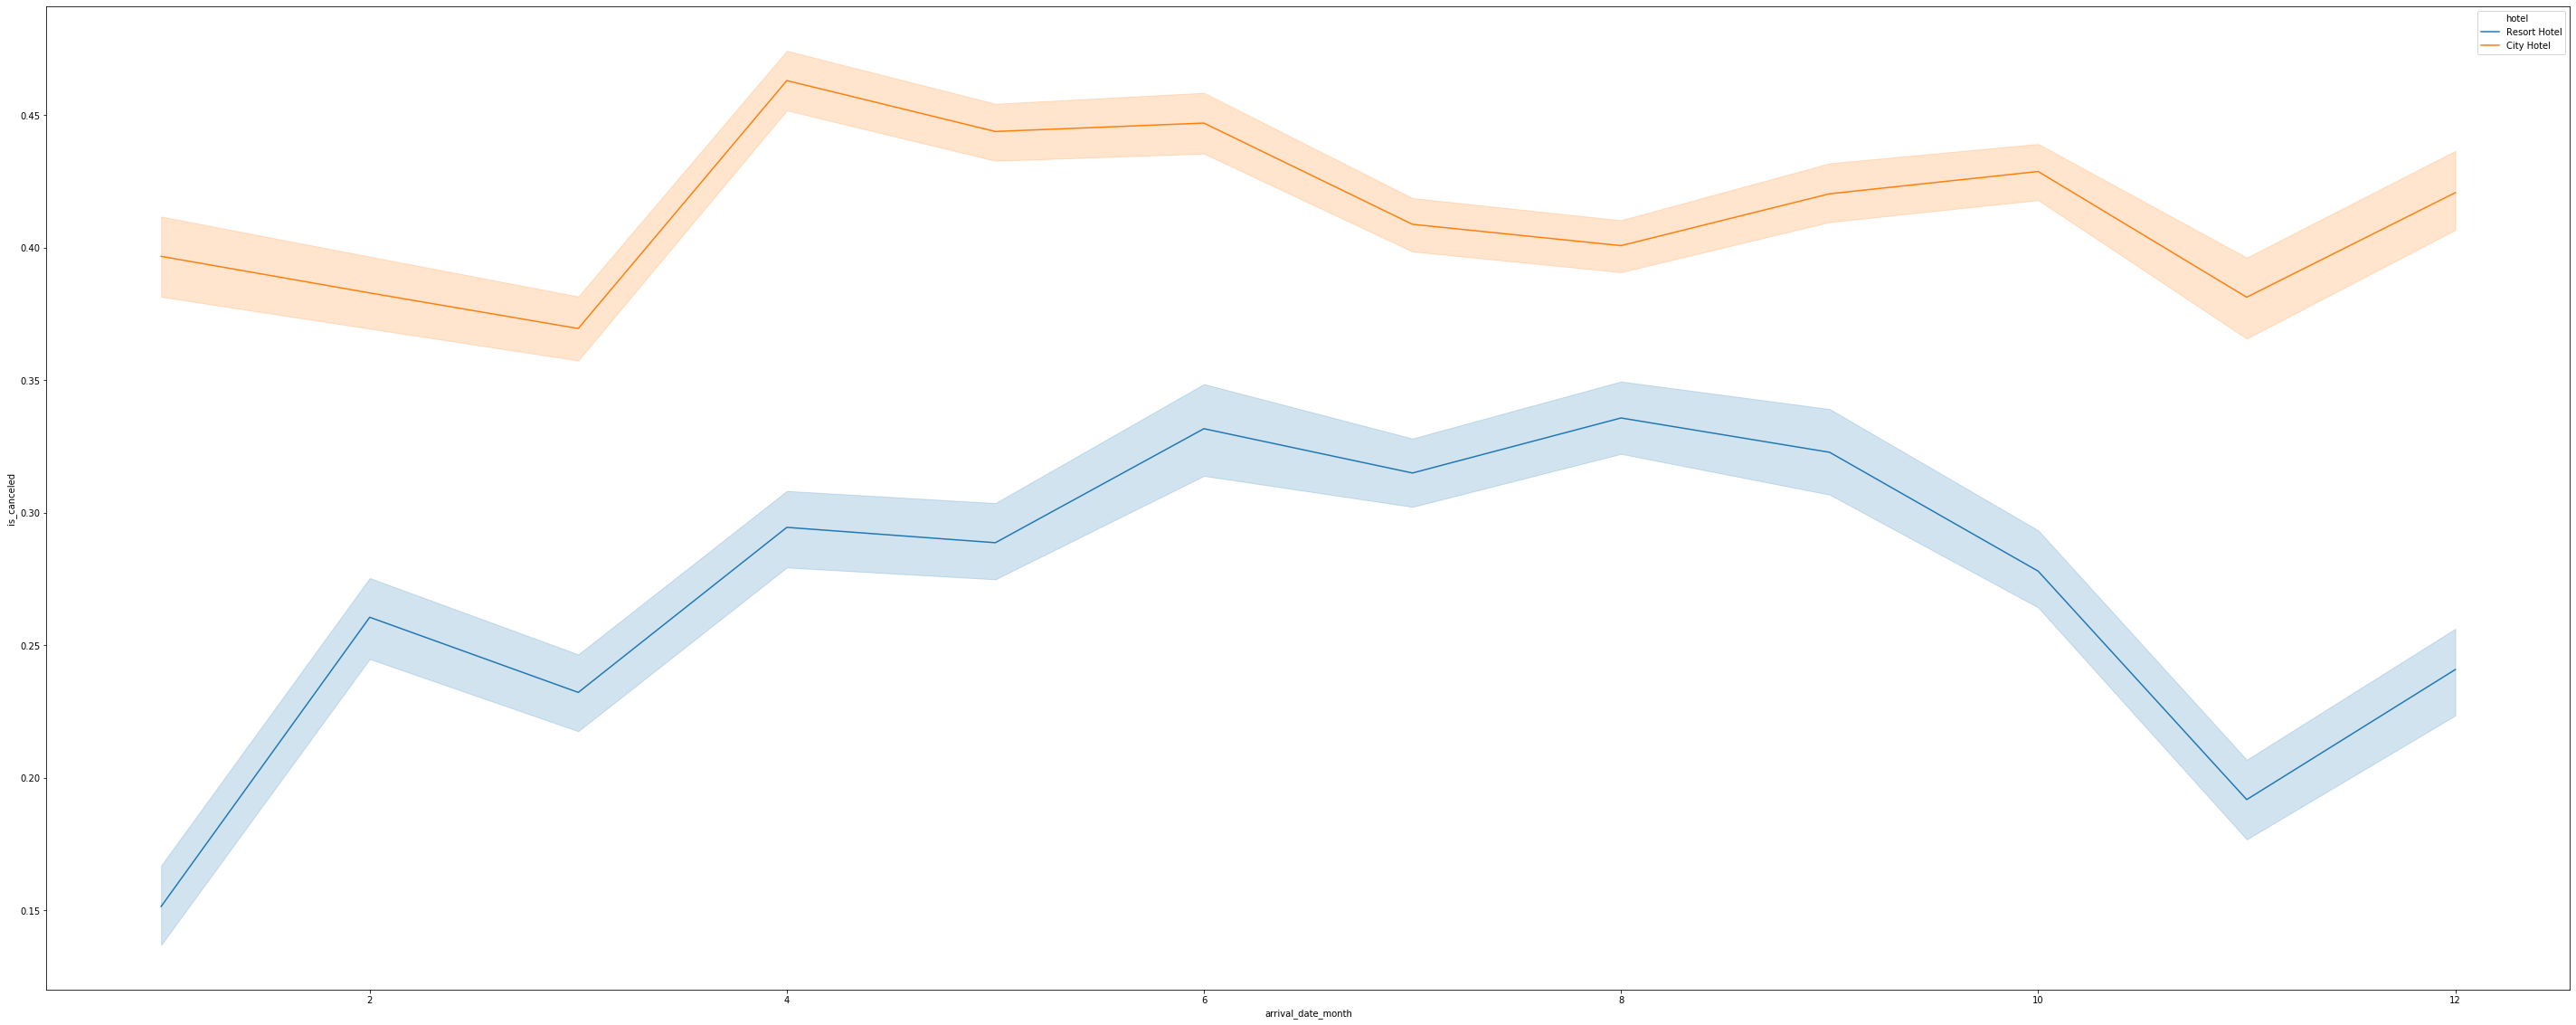

In [10]:
plt.subplots(figsize=(50,20))
sns.lineplot(x = 'arrival_date_month',y = 'is_canceled',hue = 'hotel', data = df)

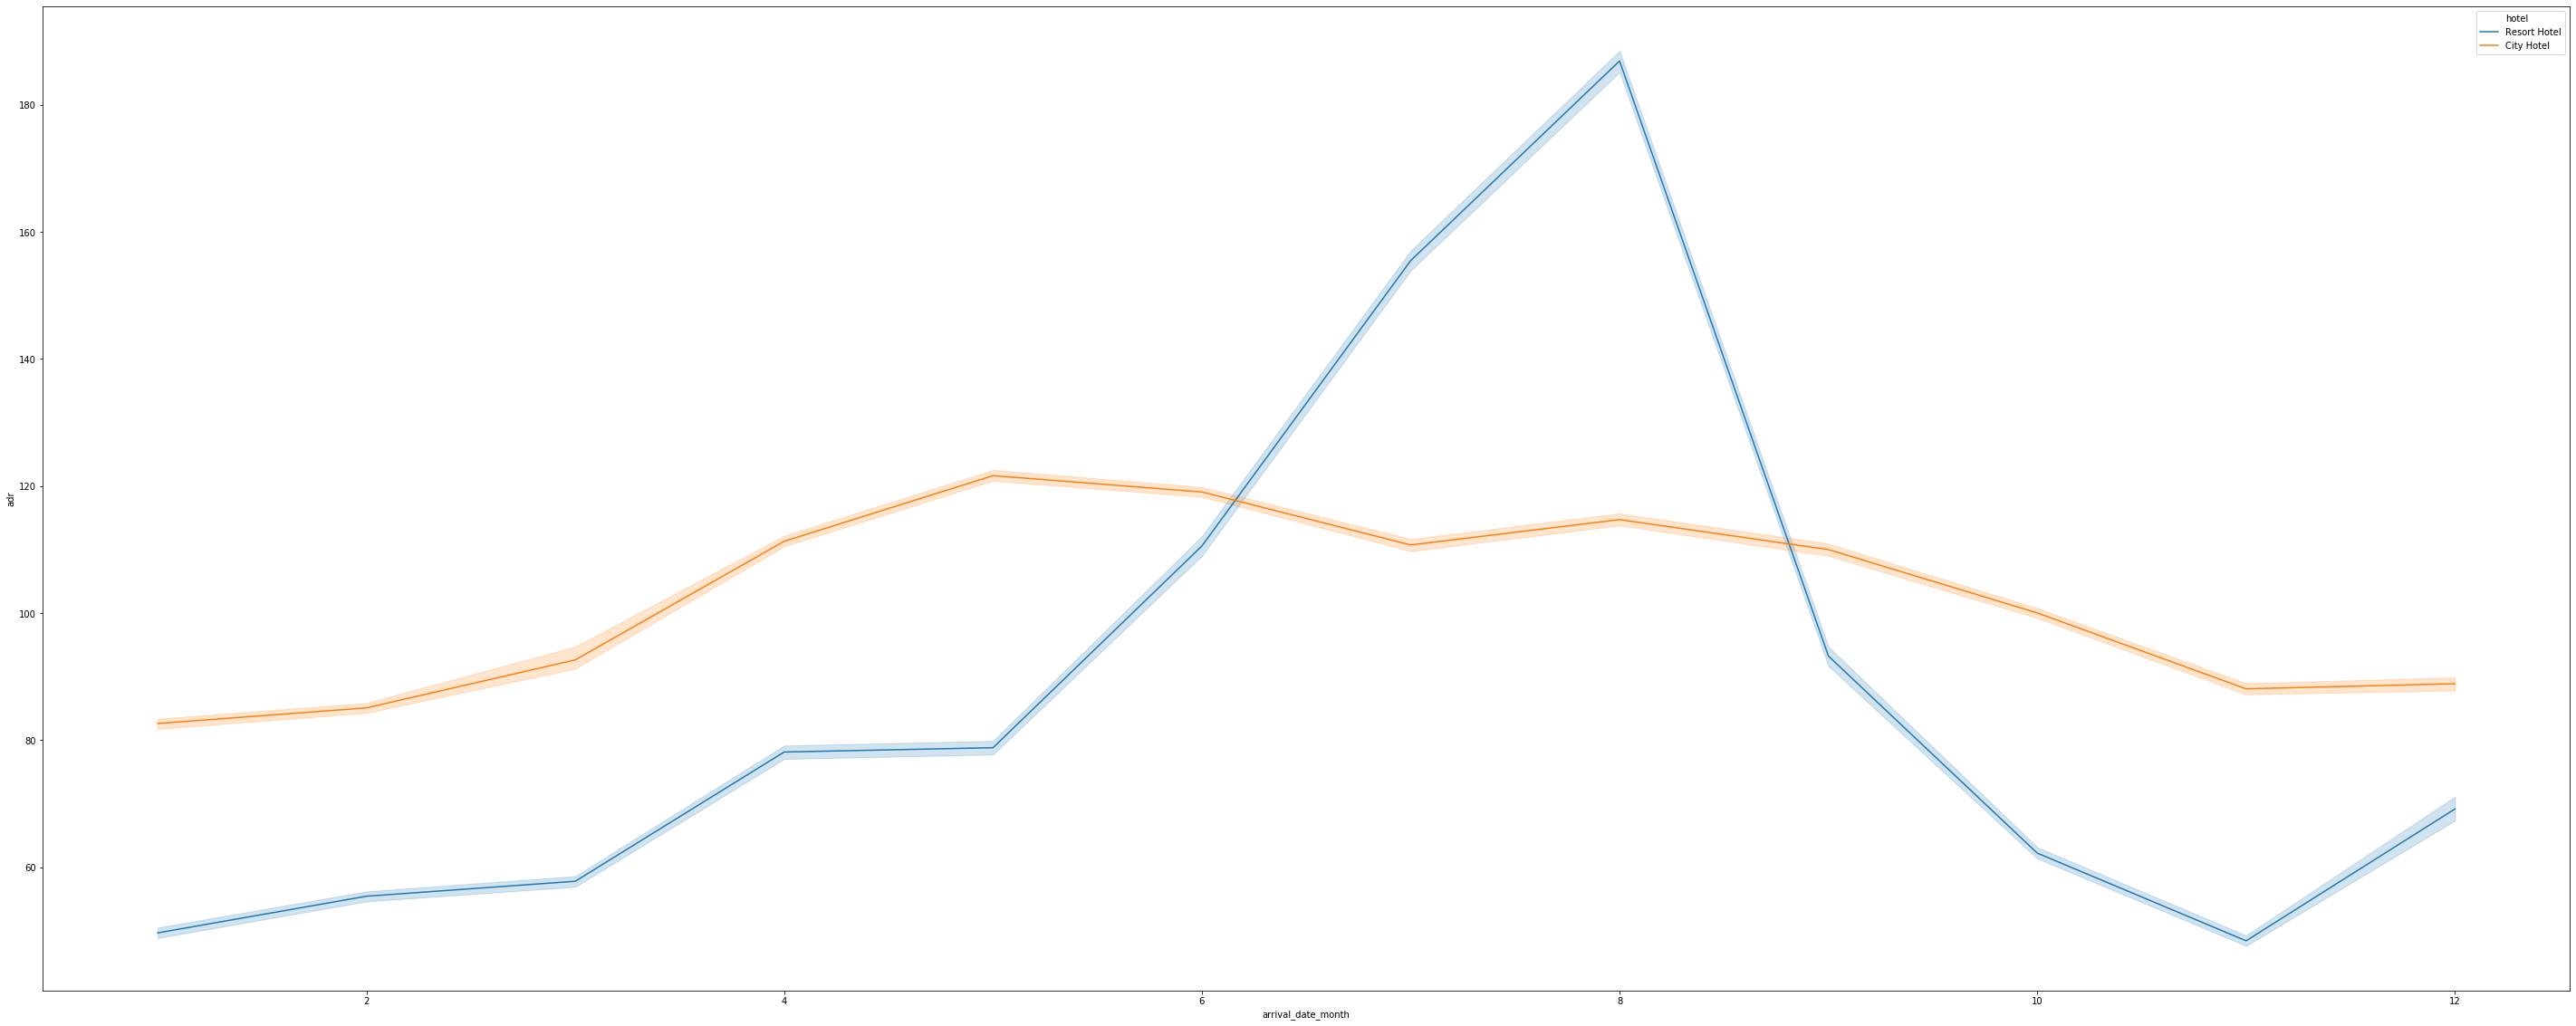

In [11]:
plt.subplots(figsize=(50,20))
sns.lineplot(x = 'arrival_date_month',y = 'adr',hue = 'hotel', data = df)

In [12]:
topcountries = df.country.value_counts().sort_values(ascending=False).head(10)

In [13]:
topcountries

PRT    48586
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

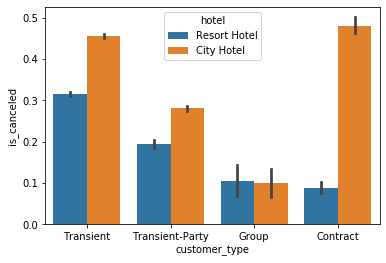

In [14]:
sns.barplot(data = df, x = 'customer_type', y = 'is_canceled',  hue = 'hotel')

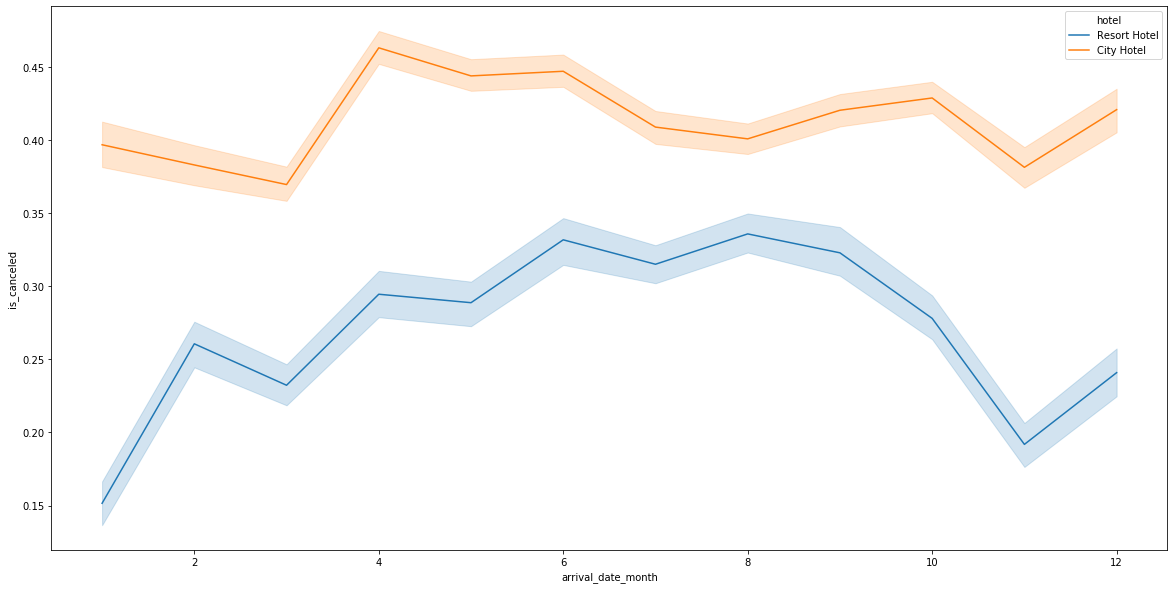

In [15]:
plt.subplots(figsize=(20,10))
sns.lineplot(x = 'arrival_date_month',y = 'is_canceled',hue = 'hotel', data = df)


In [10]:
df.drop(['country'],axis=1,inplace=True)

In [11]:
df['meal'].replace('Undefined','SC',inplace=True)

In [12]:
df.drop(['arrival_date_year','arrival_date_day_of_month','reservation_status',
        'stays_in_weekend_nights','reservation_status_date','assigned_room_type','reserved_room_type','distribution_channel'],axis=1,inplace=True)

In [13]:
x = df.drop('is_canceled',axis=1)
y = df.is_canceled


In [14]:
numericF = df.select_dtypes(include=['int64','float64']).drop(['is_canceled'],axis=1).columns
categoricalF = df.select_dtypes(include=['object']).columns


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split


In [16]:
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=0,test_size=0.2)


In [17]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
train_x = pd.get_dummies(data = train_x, columns = categoricalF, drop_first=True)
train_x.head()

,lead_time,arrival_date_month,arrival_date_week_number,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
105822,1,2,7,1,2,0.0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
42470,55,9,37,0,2,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
63246,6,2,5,2,2,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3308,66,12,49,1,2,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
92302,43,7,27,2,2,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [18]:
test_x = pd.get_dummies(data = test_x, columns = categoricalF, drop_first=True)
test_x.head()

,lead_time,arrival_date_month,arrival_date_week_number,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
76722,5,5,19,2,1,0.0,0,1,6,63,...,1,0,0,0,0,0,0,0,1,0
37312,3,6,24,1,1,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
32755,81,2,5,3,2,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
114306,186,6,25,0,2,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
101923,14,11,47,2,2,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [19]:
scaler = StandardScaler()
train_x.loc[:,numericF] = scaler.fit_transform(train_x.loc[:,numericF])
test_x.loc[:,numericF] = scaler.transform(test_x.loc[:,numericF])



In [27]:
train_x.head()

,lead_time,arrival_date_month,arrival_date_week_number,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
105822,-0.966297,-1.475142,-1.483734,-0.787592,0.249475,-0.260523,-0.082422,-0.181979,-0.101568,-0.089949,...,0,1,0,0,0,0,0,0,1,0
42470,-0.460160,0.792892,0.723518,-1.310930,0.249475,-0.260523,-0.082422,-0.181979,-0.101568,-0.089949,...,0,0,1,0,0,0,0,0,0,1
63246,-0.919433,-1.475142,-1.630885,-0.264255,0.249475,-0.260523,-0.082422,-0.181979,-0.101568,-0.089949,...,0,0,0,0,1,0,0,0,1,0
3308,-0.357059,1.764906,1.606418,-0.787592,0.249475,-0.260523,-0.082422,-0.181979,-0.101568,-0.089949,...,0,0,1,0,0,0,0,0,0,1
92302,-0.572635,0.144882,-0.012233,-0.264255,0.249475,-0.260523,-0.082422,-0.181979,-0.101568,-0.089949,...,0,0,0,0,1,0,0,0,1,0


In [20]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [21]:
#parameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [30]:
# #don't run
# from sklearn.preprocessing import StandardScaler,OneHotEncoder
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer

# numeric_transformer = Pipeline(steps=[('scaler',StandardScaler())])
# categorical_transformer = Pipeline(steps = [('onehot',OneHotEncoder(handle_unknown='ignore'))])
# preprocessor = ColumnTransformer(transformers=[('num',numeric_transformer,numericF),('cat',categorical_transformer,categoricalF)])

# clf = Pipeline(steps=[('preprocessor',preprocessor),
#                      ('classifier',KNeighborsClassifier(10))])

# train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=0,test_size=0.2)
# clf.fit(train_x,train_y)
# print('model score: %.3f'%clf.score(test_x,test_y))



In [31]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import GradientBoostingClassifier,
# RandomForestClassifier
# from sklearn.svm import LinearSVC

# classifers = [KNeighborsClassifier(5),
#              AdaBoostClassifier(),
#              GradientBoostingClassifier(),
#              RandomForestClassifier(n_estimators=100),
#              LinearSVC()
#              ]

# for classifier in classifiers:
#     pipe = Pipeline(steps=[('preprocessor',preprocessor),
#                           ('classifier',classifier)])
#     pipe.fit(train_x,train_y)
#     print(classifier)
#     print('model score: %3f'%pipe.score(test_x,test_y))
#     print("")

In [22]:
for column in train_x.columns.tolist():
    if column not in test_x.columns.tolist():
        print(column)

In [33]:
log = LogisticRegression(max_iter = 10000)
log.fit(train_x,train_y)
y_pred_train = log.predict(train_x)
y_pred_test = log.predict(test_x)

In [34]:
print("Classification Report on Train Set")
print(classification_report(train_y,y_pred_train))
print("Classification Report on Test Set")
print(classification_report(test_y,y_pred_test))

Classification Report on Train Set
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     59779
           1       0.84      0.60      0.70     35339

    accuracy                           0.81     95118
   macro avg       0.82      0.77      0.78     95118
weighted avg       0.81      0.81      0.80     95118

Classification Report on Test Set
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     14966
           1       0.84      0.60      0.70      8814

    accuracy                           0.81     23780
   macro avg       0.82      0.77      0.78     23780
weighted avg       0.81      0.81      0.80     23780



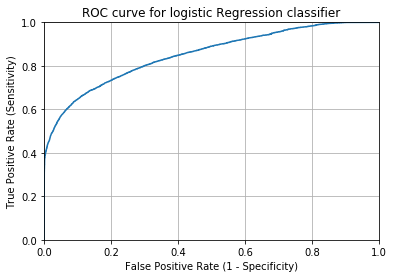

In [35]:
probability_test = log.predict_proba(test_x)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(test_y, probability_test) #rmb to enter the probability rate instead of y_pred
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for logistic Regression classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [36]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors':range(1,25,2)}
knnSearch = GridSearchCV(knn,parameters,n_jobs=-1)
knnSearch.fit(train_x,train_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': range(1, 25, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [37]:
y_pred_train = knnSearch.predict(train_x)
y_pred_test = knnSearch.predict(test_x)

In [38]:
print(knnSearch.best_estimator_)
print(knnSearch.best_score_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')
0.8235139668915681


In [39]:
print("Classification Report on Train Set")
print(classification_report(train_y,y_pred_train))
print("Classification Report on Test Set")
print(classification_report(test_y,y_pred_test))

Classification Report on Train Set
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     59779
           1       0.85      0.74      0.79     35339

    accuracy                           0.86     95118
   macro avg       0.85      0.83      0.84     95118
weighted avg       0.86      0.86      0.85     95118

Classification Report on Test Set
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     14966
           1       0.81      0.70      0.75      8814

    accuracy                           0.83     23780
   macro avg       0.82      0.80      0.81     23780
weighted avg       0.83      0.83      0.82     23780



In [40]:
KnnScore = metrics.accuracy_score(train_y,y_pred_train)
print(KnnScore)

0.8556740049202044


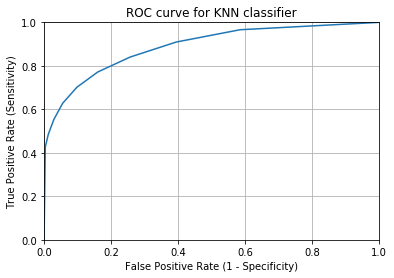

In [41]:
probability_test_knn = knnSearch.predict_proba(test_x)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(test_y, probability_test_knn) #rmb to enter the probability rate instead of y_pred
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for KNN classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [42]:
test_x.head()

,lead_time,arrival_date_month,arrival_date_week_number,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
76722,-0.928805,-0.503128,-0.600834,-0.264255,-1.504890,-0.260523,-0.082422,5.495130,6.716305,42.225540,...,1,0,0,0,0,0,0,0,1,0
37312,-0.947551,-0.179123,-0.232958,-0.787592,-1.504890,-0.260523,-0.082422,-0.181979,-0.101568,-0.089949,...,0,0,0,0,0,0,0,0,1,0
32755,-0.216465,-1.475142,-1.630885,0.259083,0.249475,-0.260523,-0.082422,-0.181979,-0.101568,-0.089949,...,0,0,0,0,1,0,0,0,0,1
114306,0.767689,-0.179123,-0.159383,-1.310930,0.249475,-0.260523,-0.082422,-0.181979,-0.101568,-0.089949,...,0,0,0,1,0,0,0,0,1,0
101923,-0.844449,1.440901,1.459268,-0.264255,0.249475,-0.260523,-0.082422,-0.181979,-0.101568,-0.089949,...,0,0,0,0,1,0,0,0,1,0


In [23]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgb = XGBClassifier(random_state=0)
parameters = {'max_depth':np.arange(2,10),'learning_rate':(0.01,0.05,0.1,0.5,1)}
xgbSearch = GridSearchCV(xgb,parameters,n_jobs=-1)
xgbSearch.fit(train_x,train_y)
y_pred_train = xgbSearch.predict(train_x)
y_pred_test = xgbSearch.predict(test_x)

In [24]:
print(xgbSearch.best_estimator_)
print(xgbSearch.best_score_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
0.8457705275721519


In [25]:
print("Classification Report on Train Set")
print(classification_report(train_y,y_pred_train))
print("Classification Report on Test Set")
print(classification_report(test_y,y_pred_test))

Classification Report on Train Set
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     59779
           1       0.92      0.84      0.88     35339

    accuracy                           0.91     95118
   macro avg       0.92      0.90      0.91     95118
weighted avg       0.91      0.91      0.91     95118

Classification Report on Test Set
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     14966
           1       0.83      0.75      0.79      8814

    accuracy                           0.85     23780
   macro avg       0.85      0.83      0.84     23780
weighted avg       0.85      0.85      0.85     23780



In [28]:
XGBoostScore = metrics.accuracy_score(train_y,y_pred_train)
print(XGBoostScore)

0.9144536260224143


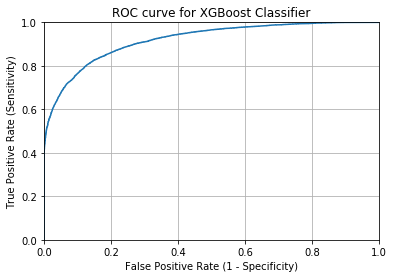

In [29]:
probability_test_xgb = xgbSearch.predict_proba(test_x)[:,1]


fpr, tpr, thresholds = metrics.roc_curve(test_y, probability_test_xgb) #rmb to enter the probability rate instead of y_pred
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for XGBoost Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [32]:
print(metrics.roc_auc_score(test_y,probability_test_xgb))

0.919507657338481


In [33]:
forest = RandomForestClassifier(random_state=0)
parameters = {'n_estimators':(100,200,300),'max_depth':(3,5,10)}
forestSearch = RandomizedSearchCV(forest,parameters,n_jobs=-1)
forestSearch.fit(train_x,train_y)

/Users/Kyla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [34]:
y_pred_train =forestSearch.predict(train_x)
y_pred_test =forestSearch.predict(test_x)

In [35]:
print(forestSearch.best_estimator_)
print(forestSearch.best_score_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
0.8164174729479567


In [36]:
print("Classification Report on Train Set")
print(classification_report(train_y,y_pred_train))
print("Classification Report on Test Set")
print(classification_report(test_y,y_pred_test))

Classification Report on Train Set
              precision    recall  f1-score   support

           0       0.80      0.95      0.87     59779
           1       0.88      0.59      0.71     35339

    accuracy                           0.82     95118
   macro avg       0.84      0.77      0.79     95118
weighted avg       0.83      0.82      0.81     95118

Classification Report on Test Set
              precision    recall  f1-score   support

           0       0.80      0.95      0.87     14966
           1       0.87      0.59      0.70      8814

    accuracy                           0.82     23780
   macro avg       0.84      0.77      0.79     23780
weighted avg       0.83      0.82      0.81     23780



In [38]:
RandomForestScore = metrics.accuracy_score(train_y,y_pred_train)
print(RandomForestScore)

0.81751088122122


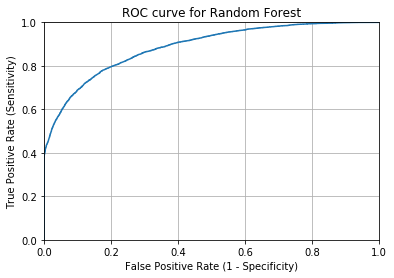

In [39]:
probability_test_forest = forestSearch.predict_proba(test_x)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(test_y, probability_test_forest) #rmb to enter the probability rate instead of y_pred
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Random Forest')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [40]:
tree = DecisionTreeClassifier(random_state=0)
parameters = {'criterion':("gini", "entropy"),'max_depth':(3,5,10)}
treeSearch = RandomizedSearchCV(tree,parameters,n_jobs=-1)
treeSearch.fit(train_x,train_y)

/Users/Kyla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=0,
          

In [41]:
y_pred_train = treeSearch.predict(train_x)
y_pred_test = treeSearch.predict(test_x)

In [42]:
print(treeSearch.best_estimator_)
print(treeSearch.best_score_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
0.8187198980544423


In [43]:
print("Classification Report on Train Set")
print(classification_report(train_y,y_pred_train))
print("Classification Report on Test Set")
print(classification_report(test_y,y_pred_test))

Classification Report on Train Set
              precision    recall  f1-score   support

           0       0.81      0.93      0.87     59779
           1       0.85      0.64      0.73     35339

    accuracy                           0.82     95118
   macro avg       0.83      0.79      0.80     95118
weighted avg       0.83      0.82      0.82     95118

Classification Report on Test Set
              precision    recall  f1-score   support

           0       0.81      0.93      0.87     14966
           1       0.84      0.64      0.73      8814

    accuracy                           0.82     23780
   macro avg       0.83      0.78      0.80     23780
weighted avg       0.82      0.82      0.82     23780



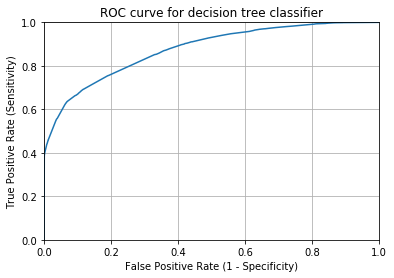

In [44]:
probability_test_tree = treeSearch.predict_proba(test_x)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(test_y, probability_test_tree) #rmb to enter the probability rate instead of y_pred
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for decision tree classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=0)
parameters = {'n_estimators':(100,200,300),'max_depth':(2,3,4)}
gbcSearch = GridSearchCV(estimator=gbc,param_grid=parameters,cv=5,n_jobs=1)
gbcSearch.fit(train_x,train_y)
y_predict_train = gbcSearch.predict(train_x)
y_predict_test = gbcSearch.predict(test_x)

In [46]:
print("Classification Report on Train Set")
print(classification_report(train_y,y_predict_train))
print("Classification Report on Test Set")
print(classification_report(test_y,y_predict_test))

Classification Report on Train Set
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     59779
           1       0.86      0.67      0.75     35339

    accuracy                           0.84     95118
   macro avg       0.84      0.80      0.82     95118
weighted avg       0.84      0.84      0.83     95118

Classification Report on Test Set
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     14966
           1       0.85      0.67      0.75      8814

    accuracy                           0.83     23780
   macro avg       0.84      0.80      0.81     23780
weighted avg       0.84      0.83      0.83     23780



In [47]:
print(gbcSearch.best_estimator_)
print(gbcSearch.best_score_)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.83037909887933


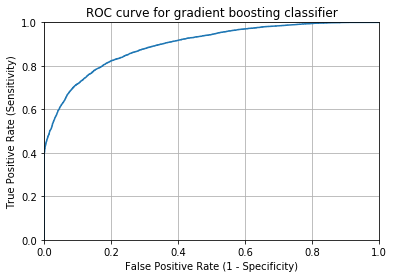

In [48]:
probability_test_gb = gbcSearch.predict_proba(test_x)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(test_y, probability_test_gb) #rmb to enter the probability rate instead of y_pred
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for gradient boosting classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [51]:
print(metrics.roc_auc_score(test_y,probability_test_gb))

0.8979720306046706
